In [1]:
import sympy as sp
r1, r2, r3, th1, th2, th3, phi1, phi3 = sp.symbols("r_1 r_2 r_3 theta_1 theta_2 theta_3 phi_1 phi_3")

# Inverse Kinematics using vectors
## find absolute vectors for each arm in the robot
$\theta_1, \theta_2, \theta_3$ show the absolute inclination of each joint.
$\phi_1, \phi_3$ show the absolute azimuth of each joint.
Initially we have the end position, $\vec{x} = (x, y, z)$, the end orientation $(\phi_3, \theta_3)$ and the arm lengths $r_1, r_2, r_3$.

arm 3 relative vector:

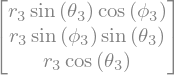

In [2]:
a3 = sp.Matrix([r3*sp.sin(th3)*sp.cos(phi3),
                r3*sp.sin(th3)*sp.sin(phi3),
                r3*sp.cos(th3)]); a3

position vector for the end of arm two:

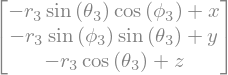

In [3]:
x3 = sp.Matrix([x, y, z])
x2 = x3 - a3; x2

arm 1 relative vector:

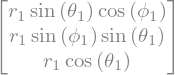

In [4]:
a1 = sp.Matrix([r1*sp.sin(th1)*sp.cos(phi1),
                r1*sp.sin(th1)*sp.sin(phi1),
                r1*sp.cos(th1)]); a1

arm 2 relative vector:

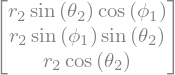

In [5]:
a2 = sp.Matrix([r2 * sp.sin(th2) * sp.cos(phi1),
                r2 * sp.sin(th2) * sp.sin(phi1),
                r2 * sp.cos(th2)]);
a2

now sum together vectors as: $\vec{a_1} + \vec{a_2} = \vec{x_2}$

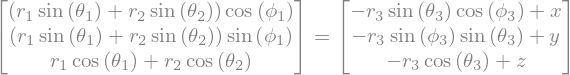

In [6]:
eq1lhs = sp.simplify(a1 + a2)
eq1rhs = x2
eq1 = sp.Eq(eq1lhs, eq1rhs); eq1

Solving this system of linear equations: you get that $\phi_1$ is: $(\frac{row2}{row1})$

In [7]:
sp.atan2(x2[1], x2[0]); phi1

# finding $\theta_1$ and $\theta_2$

first, find the length of $\vec{x_2}, |\vec{x_2}|$

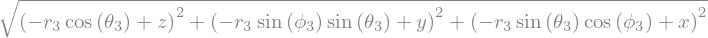

In [8]:
x2d = sp.sqrt(x2[0]**2 + x2[1]**2 + x2[2]**2); x2d

now, what is the projection of vector x2 onto the x-y plane?
now find the length of the projection, $|\vec{p_2}|$

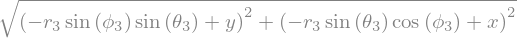

In [9]:
p2d = sp.sqrt(x2[0]**2 + x2[1]**2); p2d

$\theta_1 $ and $\theta_2$ can then be found using geometry.
Now, the relative vectors for all the arms have been found.

# Finding $\Delta\theta_3$ and $\Delta\phi_3$

we have that:

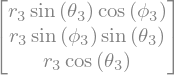

In [10]:
a3

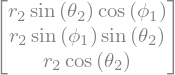

In [11]:
a2

## rotate the coordinate system such that $a2 = (0, 0, r_2)$ (i.e. a2 becomes the z axis)

In [12]:
get_z_rot_mat = lambda phi: sp.Matrix([[sp.cos(phi), -sp.sin(phi), 0],
                                       [sp.sin(phi), sp.cos(phi), 0],
                                       [0, 0, 1]])

get_y_rot_mat = lambda th: sp.Matrix([[sp.cos(th), 0, sp.sin(th)],
                                      [0, 1, 0],
                                      [-sp.sin(th), 0, sp.cos(th)]])

get_x_rot_mat = lambda th: sp.Matrix([[1, 0, 0],
                                      [0, sp.cos(th), -sp.sin(th)],
                                      [0, sp.sin(th), sp.cos(th)]])

first check that it works by doing the transform on a2:

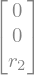

In [13]:
sp.trigsimp((get_y_rot_mat(-th2) * get_z_rot_mat(-phi1)) * a2)

now do the transform on a3:

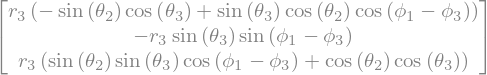

In [15]:
blob = sp.trigsimp((get_y_rot_mat(-th2) * get_z_rot_mat(-phi1)) * a3); blob

check that the length is correct:

In [18]:
sp.simplify(blob[0]**2 + blob[1]**2 + blob[2]**2)

now find this in spherical coordinates:

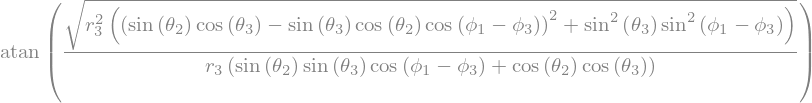

In [21]:
dtheta3 = sp.atan(sp.simplify(sp.sqrt(blob[0]**2 + blob[1]**2))/blob[2]); dtheta3

In [23]:
dphi3 = sp.atan2(blob[1], blob[1]); dphi3